In [10]:
import matplotlib
matplotlib.use('tkagg')

In [54]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib import cm
import numpy as np
from datetime import datetime
import seaborn as sns

In [55]:
# %matplotlib inline

In [56]:
path='https://covid19.isciii.es/resources/serie_historica_acumulados.csv'
path1='https://cnecovid.isciii.es/covid19/resources/datos_ccaas.csv'

In [57]:
df = pd.read_csv(path1,encoding='ISO-8859-1',engine='python',skipfooter=0)

In [58]:
df

,ccaa_iso,fecha,num_casos,num_casos_prueba_pcr,num_casos_prueba_test_ac,num_casos_prueba_otras,num_casos_prueba_desconocida
0,AN,2020-01-31,0,0,0,0,0
1,AR,2020-01-31,0,0,0,0,0
2,AS,2020-01-31,0,0,0,0,0
3,CB,2020-01-31,0,0,0,0,0
4,CE,2020-01-31,0,0,0,0,0
...,...,...,...,...,...,...,...
3776,ML,2020-08-16,1,1,0,0,0
3777,NC,2020-08-16,55,55,0,0,0
3778,PV,2020-08-16,549,549,0,0,0
3779,RI,2020-08-16,34,33,0,0,1


In [59]:
comunidades={'AN':['Andalucia',8426405],
 'AR':['Aragon',1320794],
 'AS':['Asturias',1022293],
 'CB':['Cantabria',581684],
 'CE':['Ceuta',84843],
 'CL':['Castilla y León',2408083],
 'CM':['Castilla La Mancha',2035505],
 'CN':['Islas Canarias',2207225],
 'CT':['Cataluña',7565099],
 'EX':['Extremadura',1065371],
 'GA':['Galicia',2700330],
 'IB':['Islas Baleares',1187802],
 'MC':['Murcia',1487698],
 'MD':['Madrid',6640705],
 'ML':['Melilla',84714],
 'NC':['Navarra',649966],
 'PV':['Pais Vasco',2178048],
 'RI':['Rioja',313582],
 'VC':['Valencia',4974475]}

In [60]:
df.columns

Index(['ccaa_iso', 'fecha', 'num_casos', 'num_casos_prueba_pcr',
       'num_casos_prueba_test_ac', 'num_casos_prueba_otras',
       'num_casos_prueba_desconocida'],
      dtype='object')

In [61]:
set(df['ccaa_iso'])

{'AN',
 'AR',
 'AS',
 'CB',
 'CE',
 'CL',
 'CM',
 'CN',
 'CT',
 'EX',
 'GA',
 'IB',
 'MC',
 'MD',
 'ML',
 'NC',
 'PV',
 'RI',
 'VC'}

In [62]:
pob_spain=0
for com in comunidades:
    pob_spain+=comunidades[com][1]

In [63]:
comunidades.keys()

dict_keys(['AN', 'AR', 'AS', 'CB', 'CE', 'CL', 'CM', 'CN', 'CT', 'EX', 'GA', 'IB', 'MC', 'MD', 'ML', 'NC', 'PV', 'RI', 'VC'])

In [64]:
df['fecha']=pd.to_datetime(df['fecha'],format='%Y/%m/%d')
df.sort_values(['fecha'],inplace=True)

In [65]:
df.set_index(['fecha','ccaa_iso'],inplace=True)

In [66]:
df.fillna(0)

num_casos  num_casos_prueba_pcr  \
fecha      ccaa_iso                                    
2020-01-31 AN                0                     0   
           VC                4                     3   
           RI                0                     0   
           PV                0                     0   
           NC                0                     0   
...                        ...                   ...   
2020-08-16 AR              247                   226   
           AN              269                   269   
           RI               34                    33   
           CT              330                   330   
           VC              111                   111   

                     num_casos_prueba_test_ac  num_casos_prueba_otras  \
fecha      ccaa_iso                                                     
2020-01-31 AN                               0                       0   
           VC                               1                       0   
           RI                               0                       0   
           PV                               0                       0   
           NC                               0                       0   
...                                       ...                     ...   
2020-08-16 AR                               0                       0   
           AN                               0                       0   
           RI                               0                       0   
           CT                               0                       0   
           VC                               0                       0   

                     num_casos_prueba_desconocida  
fecha      ccaa_iso                                
2020-01-31 AN                                   0  
           VC                                   0  
           RI                                   0  
           PV                                   0  
           NC                                   0  
...                                           ...  
2020-08-16 AR                                  21  
           AN                                   0  
           RI                                   1  
           CT                                   0  
           VC                                   0  

[3781 rows x 5 columns]

In [68]:
resumen_por_dias=df.pivot_table(index=['fecha'],values=['num_casos'],aggfunc=np.sum)

In [70]:
resultados={}
pd.options.mode.chained_assignment = None  # default='warn'
fallecidos_spain=0
for com in comunidades:
    df_aux=df.xs(com,level=1,drop_level=True)
    df_aux['Inc_Casos']=df_aux['num_casos'].diff()
    df_aux['Ratio_Casos']=df_aux['Inc_Casos']/df_aux['num_casos']
    df_aux['Ratio_Casos_ayer']=df_aux['Inc_Casos'].pct_change()
    resultados[com]=df_aux
pd.options.mode.chained_assignment = 'warn'


In [71]:
resultados['MD']

,num_casos,num_casos_prueba_pcr,num_casos_prueba_test_ac,num_casos_prueba_otras,num_casos_prueba_desconocida,Inc_Casos,Ratio_Casos,Ratio_Casos_ayer
fecha,,,,,,,,
2020-01-31,4,4,0,0,0,NaN,NaN,NaN
2020-02-01,9,9,0,0,0,5.0,0.555556,NaN
2020-02-02,6,6,0,0,0,-3.0,-0.500000,-1.600000
2020-02-03,7,7,0,0,0,1.0,0.142857,-1.333333
2020-02-04,3,3,0,0,0,-4.0,-1.333333,-5.000000
...,...,...,...,...,...,...,...,...
2020-08-12,1354,1354,0,0,0,-1074.0,-0.793205,-2.688679
2020-08-13,1015,1015,0,0,0,-339.0,-0.333990,-0.684358
2020-08-14,1290,1290,0,0,0,275.0,0.213178,-1.811209


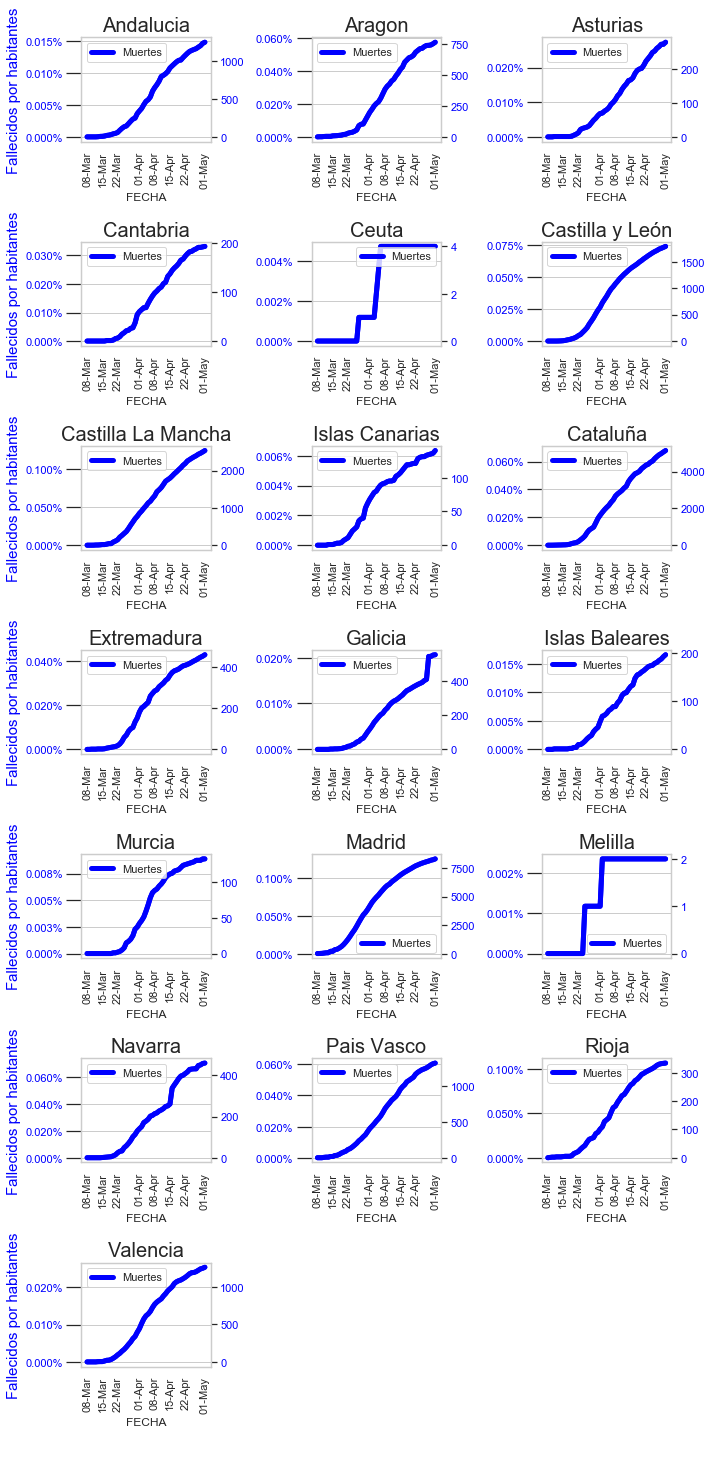

In [65]:
def format_x(value, tick_number):
        return  datetime.fromordinal(int(value)).strftime('%d-%b')

    
def format_y(value, tick_number):
        return  '{:.3%}'.format(value)
    
    
f = plt.figure(figsize=(10,20))
f.subplots_adjust(hspace=.5, wspace=.5)
f.suptitle('Muertes por Comunidad: '+datetime.today().strftime('%d/%m/%Y')
           ,fontsize=30,y=0)
sns.set_style("whitegrid")
sns.set_palette(sns.color_palette("RdBu_r",19))

for i,comunidad in enumerate(comunidades):
    axe=f.add_subplot(7,3,i+1)
    t=resultados[comunidad].index
    data1=resultados[comunidad]['Fallecidos_por_hab']
    data2=resultados[comunidad]['CASOS']
    data3=resultados[comunidad]['Fallecidos']
    axe.set_title(comunidades[comunidad][0],size=20)
    sns.lineplot(t, data1, ax=axe,color='blue',linewidth=5)
    axe.tick_params(axis='y', labelcolor='blue',size=15)
    if i % 3 == 0 :
        axe.set_ylabel('Fallecidos por habitantes', color='blue',size=15)
    else:
        axe.set_ylabel('', color='blue',size=15)
    axe.yaxis.set_major_formatter(plt.FuncFormatter(format_y))    
    axe.get_xaxis().set_ticks([])
    axe.get_xaxis().set_visible(False)
    
    ax2 = axe.twinx()  # instantiate a second axes that shares the same x-axis
    
    ax2.grid(False)
    ax2.xaxis.set_major_formatter(plt.FuncFormatter(format_x))
    #color = 'tab:blue'
    #ax2.set_ylabel('', color=color)  # we already handled the x-label with ax1
    #ax2.plot(t, data2, color=color,label='Confirmados')
    #ax2.plot(t,data3,color='black',label='Activos')
    
    #sns.lineplot(t, data2, label='Casos',ax=ax2,color=sns.color_palette('RdBu_r',7)[0],linewidth=5)
    sns.lineplot(t,data3,label='Muertes',ax=ax2,color='blue',linewidth=5)
    
    #ax2.tick_params(axis='y', labelcolor=color)

    ax2.set_ylabel('', color=sns.color_palette('RdBu_r',7)[0])
    ax2.get_xaxis().set_visible(True)   
    ax2.xaxis.set_major_formatter(plt.FuncFormatter(format_x))
    ax2.tick_params(axis='y', labelcolor='blue')
    ax2.tick_params(axis='x',labelrotation=90)
    ax2.legend()
    #ax2.set_yscale('log')
    
f.tight_layout()  # otherwise the right y-label is slightly clipped
#f.savefig('graficos/grafico_muertes_com.png')

In [76]:
def format_x(value, tick_number):
    return  datetime.fromordinal(int(value)).strftime('%d-%b')

def format_y(value, tick_number):
    return '{0:.0f} por millón\n casos'.format(value*1000000)
    #return value
def grafico_temporal (datos,category,scale='linear'):
    res_aux={}
    color_pais={}
    current_palette = sns.color_palette('deep',20)
    res_aux=datos
    for i,com in enumerate(datos):
        color_pais[com]=current_palette[i]

    plt.rc('figure', facecolor='black')
    plt.style.use('dark_background')
    f = plt.figure(figsize=(8,12))
    ax1 = f.add_subplot(111)
    ax1.set_title(category,size=20)
    #f.subplots_adjust(hspace=.5, wspace=0.5)
    sns.set(palette='deep')
    #sns.set_style("whitegrid")
    #current_palette = sns.color_palette('husl',12)
    sns.set_palette(current_palette)
    for i in res_aux:
        t=res_aux[i].index
        
        p=sns.lineplot(t, res_aux[i][category], label=comunidades[i][0],ax=ax1,linewidth=4,color=color_pais[i])
        p.text(t[-1],res_aux[i][category].iloc[-1],' '+comunidades[i][0],
               horizontalalignment='left', size='medium', color='white')
        #ylabels=['{} por millón'.format(x) for x in p.get_yticks()*1000000]
        #p.set_yticklabels(ylabels)
        #ax1.get_xaxis().set_visible(True) 
    
    ax1.xaxis.set_major_formatter(plt.FuncFormatter(format_x))
    ax1.yaxis.set_major_formatter(plt.FuncFormatter(format_y))
    ax1.tick_params(axis='y',direction='out',labelrotation=0,labelsize=15)
    ax1.tick_params(axis='x',direction='out',labelrotation=0,labelsize=10)
    #ax1.set_xlabel('Fecha', color='white',size=15)
    #ax1.set_ylabel('Tasa de '+category, color='white',size=15)
    y_axis = ax1.axes.get_yaxis().get_label().set_visible(False)
    x_axis = ax1.axes.get_xaxis().get_label().set_visible(False)
    #ax1.legend(prop={'size':10},loc=6)
    ax1.legend().set_visible(False)
    ax1.grid(False,which='both')
    #ax1.get_xaxis().set_visible(False)
    #ax1.get_yaxis().set_visible(False)
    #p.legend.remove()
    #ax1.set_yscale(scale)
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.spines['left'].set_visible(False)
    ax1.spines['bottom'].set_visible(False)
    path='graficos/'
    nombre_fichero=path+category+'_'+'_'+str(scale)+'.png'
    plt.tight_layout()
    f.savefig(nombre_fichero)
    return 

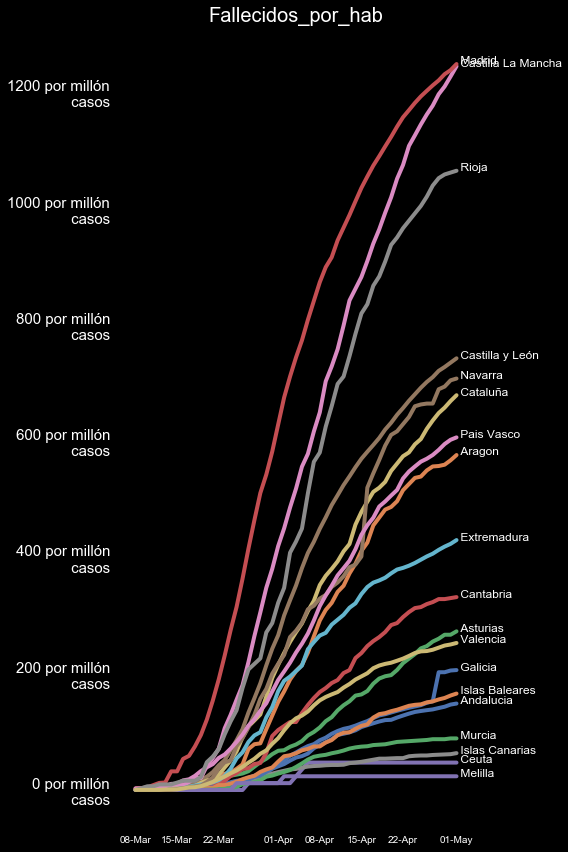

In [67]:
grafico_temporal(resultados,'Fallecidos_por_hab')

In [68]:
mean_ratio=resultados['MD']['Fallecidos_por_casos'].mean()

In [69]:
colors

array([[0.19215686, 0.21176471, 0.58431373, 1.        ],
       [0.19215686, 0.21176471, 0.58431373, 1.        ],
       [0.19215686, 0.21176471, 0.58431373, 1.        ],
       [0.19215686, 0.21176471, 0.58431373, 1.        ],
       [0.19215686, 0.21176471, 0.58431373, 1.        ],
       [0.19215686, 0.21176471, 0.58431373, 1.        ],
       [0.19215686, 0.21176471, 0.58431373, 1.        ],
       [0.96516724, 0.48742791, 0.29042676, 1.        ],
       [0.22599   , 0.3183391 , 0.63675509, 1.        ],
       [0.71541715, 0.87297193, 0.92641292, 1.        ],
       [0.19215686, 0.21176471, 0.58431373, 1.        ],
       [0.19215686, 0.21176471, 0.58431373, 1.        ],
       [0.32479815, 0.52341407, 0.73933103, 1.        ],
       [0.19215686, 0.21176471, 0.58431373, 1.        ],
       [0.32479815, 0.52341407, 0.73933103, 1.        ],
       [0.19215686, 0.21176471, 0.58431373, 1.        ],
       [0.32479815, 0.52341407, 0.73933103, 1.        ],
       [0.19215686, 0.21176471,

In [73]:
def format_x(value, tick_number):
        return  datetime.fromordinal(int(value)).strftime('%d-%b')


KeyError: 'Fallecidos_por_hab'

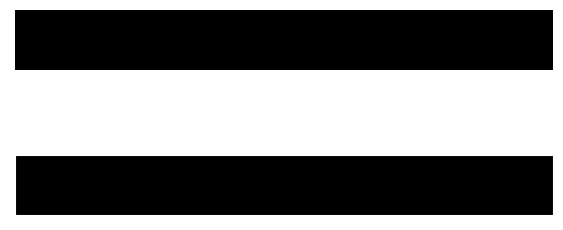

In [75]:
# Set canvas background color the same as axes
#mean_ratio=0.001
plt.rc('figure', facecolor='white')
#plt.ion()
# Arrange city based on latitude

# set constrianed_layout as True to avoid axes overlap
#fig = plt.figure(figsize=(2,5), dpi=300, constrained_layout=True)
fig = plt.figure(figsize=(10,20),dpi=100)

# Use GridSpec for customising layout
gs = fig.add_gridspec(nrows=21, ncols=10)

ax=fig.add_subplot(gs[0,1:8])
ax.bar(resultados['MD'].index,0,width=.7,align='edge')
ax.spines['bottom'].set_visible(False)  
ax.spines['right'].set_color(None)  
ax.spines['left'].set_color(None)  
ax.spines['top'].set_color(None)
ax.grid(False)
ax.tick_params(axis='x',direction='out',labelrotation=90)
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_x))

ax.axes.get_yaxis().set_visible(False)
ax.get_xaxis().set_ticks(resultados['MD'].index[::7])
#ax.get_yaxis().set_ticks([])

for i, com in enumerate(comunidades):
    #ax = fig.add_subplot(19,1,i+1, ylim=(-.0001, 0.0001))
    ax = fig.add_subplot(gs[i+2, 1:8])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    df_data=resultados[com]
    mean_ratio=df_data['Fallecidos_por_hab'].mean()
    # color scheme
    #colors = cm.RdYlBu_r(resultados[com]['Fallecidos_por_hab'] / resultados[com]['Fallecidos_por_hab'].max())
    #ax.bar(resultados[com].index, df_data['Fallecidos_por_hab'] - mean_ratio, label='_1',color=colors,
    #       width=0.7, align="edge")
    
    colors = cm.RdYlBu_r(df_data['Ratio_Casos_ayer'] / df_data['Ratio_Casos_ayer'].replace(np.inf,np.nan).max())
    ax.bar(df_data.index, df_data['Ratio_Casos_ayer'], label='_1',color=colors,
           width=1, align="edge")
    
    # customise axes
    ax.spines['bottom'].set_color(None)  
    ax.spines['right'].set_color(None)  
    ax.spines['left'].set_color(None)  
    ax.spines['top'].set_color(None) 
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.set_ylabel(comunidades[com][0], rotation=0, color='#e3e3e3', fontsize=10, fontweight='bold')
    
    ax1 = fig.add_subplot(gs[i+2,0])
    ax1.annotate('{}'.format(comunidades[com][0]), (0.5, 0.5), size=15,xycoords='axes fraction', va='center', ha='right')
    ax1.spines['bottom'].set_color(None)  
    ax1.spines['right'].set_color(None)  
    ax1.spines['left'].set_color(None)  
    ax1.spines['top'].set_color(None) 
    ax1.get_xaxis().set_ticks([])
    ax1.get_yaxis().set_ticks([])
    
    ax2=fig.add_subplot(gs[i+2,9:10])
    circle1 = plt.Circle((0.5, 0.5), 0.2, color='r')
    ax2.add_artist(circle1)
plt.show()

In [72]:
colors = cm.RdYlBu_r(df_data['Ratio_Casos_ayer'] / df_data['Ratio_Casos_ayer'].replace(np.inf,np.nan).max())

KeyError: 'Fallecidos_por_hab'

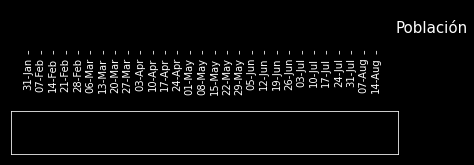

In [74]:
# Set canvas background color the same as axes
#mean_ratio=0.001
plt.rc('figure', facecolor='black')
plt.style.use('dark_background')
#plt.ion()
# Arrange city based on latitude

# set constrianed_layout as True to avoid axes overlap
#fig = plt.figure(figsize=(2,5), dpi=300, constrained_layout=True)
fig = plt.figure(figsize=(10,20))

# Use GridSpec for customising layout
gs = fig.add_gridspec(nrows=21, ncols=10)

ax=fig.add_subplot(gs[0,1:8])
ax.bar(resultados['MD'].index,0,width=.7,align='edge',color='black')
ax.spines['bottom'].set_color('black')  
ax.spines['right'].set_color('black')  
ax.spines['left'].set_color('black')  
ax.spines['top'].set_color('black')
ax.grid(False)
ax.tick_params(axis='x',direction='out',labelrotation=90)
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_x))

ax.axes.get_yaxis().set_visible(False)
ax.get_xaxis().set_ticks(resultados['MD'].index[::7])
#ax.get_yaxis().set_ticks([])
ax1 = fig.add_subplot(gs[0,8:9])
ax1.annotate('{}'.format('Población'), (0.5, 0.5), size=15,xycoords='axes fraction', va='center', ha='center')
ax1.spines['bottom'].set_color('black')  
ax1.spines['right'].set_color('black')  
ax1.spines['left'].set_color('black')  
ax1.spines['top'].set_color('black') 
ax1.get_xaxis().set_ticks([])
ax1.get_yaxis().set_ticks([])


for i, com in enumerate(comunidades):
    #ax = fig.add_subplot(19,1,i+1, ylim=(-.0001, 0.0001))
    ax = fig.add_subplot(gs[i+2, 1:8],ylim=(0.0,0.15))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    df_data=resultados[com]
    mean_ratio=df_data['Fallecidos_por_hab'].mean()
    # color scheme
    #colors = cm.RdYlBu_r(resultados[com]['Fallecidos_por_hab'] / resultados[com]['Fallecidos_por_hab'].max())
    #ax.bar(resultados[com].index, df_data['Fallecidos_por_hab'] - mean_ratio, label='_1',color=colors,
    #       width=0.7, align="edge")
    
    #colors = cm.RdYlBu_r(df_data['Fallecidos_por_casos'] / df_data['Fallecidos_por_casos'].replace(np.inf,np.nan).max())
    colors = cm.RdYlBu_r(df_data['Fallecidos_por_casos'] / 0.15)
    ax.bar(df_data.index, df_data['Fallecidos_por_casos'], label='_1',color=colors,
           width=1, align="edge")
    
    # customise axes
    ax.spines['bottom'].set_color('black')  
    ax.spines['right'].set_color('black')  
    ax.spines['left'].set_color('black')  
    ax.spines['top'].set_color('black') 
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.set_ylabel(comunidades[com][0], rotation=0, color='#e3e3e3', fontsize=10, fontweight='bold')
    
    ax1 = fig.add_subplot(gs[i+2,0])
    ax1.annotate('{}'.format(comunidades[com][0]), (0.5, 0.5), size=15,xycoords='axes fraction', va='center', ha='right')
    ax1.spines['bottom'].set_color('black')  
    ax1.spines['right'].set_color('black')  
    ax1.spines['left'].set_color('black')  
    ax1.spines['top'].set_color('black') 
    ax1.get_xaxis().set_ticks([])
    ax1.get_yaxis().set_ticks([])
    
    ax2=fig.add_subplot(gs[i+2,8:9])
    circle1 = plt.Circle((0.5, 0.5), np.sqrt(comunidades[com][1]/np.pi)/5000, color='blue')
    ax2.spines['bottom'].set_color('black')  
    ax2.spines['right'].set_color('black')  
    ax2.spines['left'].set_color('black')  
    ax2.spines['top'].set_color('black') 
    #ax2.set_ylabel('', rotation=0, color='black')
    #ax2.set_xlabel('', rotation=0, color='black')
    ax2.get_xaxis().set_visible(False)
    ax2.get_yaxis().set_visible(False)
    ax2.add_artist(circle1)
plt.show()

In [33]:
resultados

{'AN':             CASOS     PCR+  TestAc+  Hospitalizados    UCI  Fallecidos  \
 FECHA                                                                    
 2020-02-20    NaN      NaN      NaN             NaN    NaN         NaN   
 2020-02-21    NaN      NaN      NaN             NaN    NaN         NaN   
 2020-02-22    NaN      NaN      NaN             NaN    NaN         NaN   
 2020-02-23    NaN      NaN      NaN             NaN    NaN         NaN   
 2020-02-24    NaN      NaN      NaN             NaN    NaN         NaN   
 ...           ...      ...      ...             ...    ...         ...   
 2020-04-26    NaN  11852.0   1308.0          5768.0  720.0      1157.0   
 2020-04-27    NaN  11913.0   1337.0          5793.0  721.0      1168.0   
 2020-04-28    NaN  12004.0   1497.0          5832.0  722.0      1188.0   
 2020-04-29    NaN  12048.0   1640.0          5874.0  721.0      1207.0   
 2020-04-30    NaN  12161.0   1785.0          5936.0  729.0      1238.0   
 
             Recu

NameError: name 'format_x' is not defined

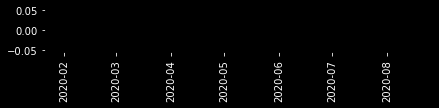

In [72]:
# Set canvas background color the same as axes
#mean_ratio=0.001
plt.rc('figure', facecolor='black')
plt.style.use('dark_background')
#plt.ion()
# Arrange city based on latitude

# set constrianed_layout as True to avoid axes overlap
#fig = plt.figure(figsize=(2,5), dpi=300, constrained_layout=True)
fig = plt.figure(figsize=(10,20))

# Use GridSpec for customising layout
gs = fig.add_gridspec(nrows=21, ncols=10)

ax=fig.add_subplot(gs[0,1:8])
ax.bar(resultados['MD'].index,0,width=.7,align='edge',color='black')
ax.spines['bottom'].set_color('black')  
ax.spines['right'].set_color('black')  
ax.spines['left'].set_color('black')  
ax.spines['top'].set_color('black')
ax.grid(False)
ax.tick_params(axis='x',direction='out',labelrotation=90)
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_x))

ax.axes.get_yaxis().set_visible(False)
ax.get_xaxis().set_ticks(resultados['MD'].index[::7])
#ax.get_yaxis().set_ticks([])
ax1 = fig.add_subplot(gs[0,8:9])
ax1.annotate('{}'.format('Población'), (0.5, 0.5), size=15,xycoords='axes fraction', va='center', ha='center')
ax1.spines['bottom'].set_color('black')  
ax1.spines['right'].set_color('black')  
ax1.spines['left'].set_color('black')  
ax1.spines['top'].set_color('black') 
ax1.get_xaxis().set_ticks([])
ax1.get_yaxis().set_ticks([])


for i, com in enumerate(comunidades):
    #ax = fig.add_subplot(19,1,i+1, ylim=(-.0001, 0.0001))
    ax = fig.add_subplot(gs[i+2, 1:8],ylim=(0.0,0.0010))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    df_data=resultados[com]
    # color scheme
    #colors = cm.RdYlBu_r(resultados[com]['Fallecidos_por_hab'] / resultados[com]['Fallecidos_por_hab'].max())
    #ax.bar(resultados[com].index, df_data['Fallecidos_por_hab'] - mean_ratio, label='_1',color=colors,
    #       width=0.7, align="edge")
    
    #colors = cm.RdYlBu_r(df_data['Fallecidos_por_casos'] / df_data['Fallecidos_por_casos'].replace(np.inf,np.nan).max())
    #colors = cm.RdYlBu_r(colores[:,i])
    
    mean_ratio=df_data['Ratio_Casos_ayer'].replace([np.inf, -np.inf], np.NaN).mean()
    stadev=df_data['Ratio_Casos_ayer'].replace([np.inf, -np.inf], np.NaN).std()
    maximo=df_data['Ratio_Casos_ayer'].replace([np.inf],0).replace([-np.inf],-0).max()
    minimo=df_data['Ratio_Casos_ayer'].replace([np.inf],0).replace([-np.inf],-0).min()
    rango_colores=(df_data['Ratio_Casos_ayer'].replace([np.inf],0)-minimo)/(maximo-minimo)
    colors = cm.RdYlBu_r(rango_colores)
    
    ax.bar(df_data.index, df_data['Fallecidos_por_hab'], label='_1',color=colors,
           width=1, align="edge")
    
    # customise axes
    ax.spines['bottom'].set_color('black')  
    ax.spines['right'].set_color('black')  
    ax.spines['left'].set_color('black')  
    ax.spines['top'].set_color('black') 
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.set_ylabel(comunidades[com][0], rotation=0, color='#e3e3e3', fontsize=10, fontweight='bold')
    
    ax1 = fig.add_subplot(gs[i+2,0])
    ax1.annotate('{}'.format(comunidades[com][0]), (0.5, 0.5), size=15,xycoords='axes fraction', va='center', ha='right')
    ax1.spines['bottom'].set_color('black')  
    ax1.spines['right'].set_color('black')  
    ax1.spines['left'].set_color('black')  
    ax1.spines['top'].set_color('black') 
    ax1.get_xaxis().set_ticks([])
    ax1.get_yaxis().set_ticks([])
    
    ax2=fig.add_subplot(gs[i+2,8:9])
    circle1 = plt.Circle((0.5, 0.5), np.sqrt(comunidades[com][1]/np.pi)/5000, color='blue')
    ax2.spines['bottom'].set_color('black')  
    ax2.spines['right'].set_color('black')  
    ax2.spines['left'].set_color('black')  
    ax2.spines['top'].set_color('black') 
    #ax2.set_ylabel('', rotation=0, color='black')
    #ax2.set_xlabel('', rotation=0, color='black')
    ax2.get_xaxis().set_visible(False)
    ax2.get_yaxis().set_visible(False)
    ax2.add_artist(circle1)
plt.show()

In [35]:
maximo=resultados['MD']['Ratio_Casos_ayer'].replace([np.inf],0).replace([-np.inf],-0).max()
minimo=resultados['MD']['Ratio_Casos_ayer'].replace([np.inf],0).replace([-np.inf],-0).min()
rango_colores=(resultados['MD']['Ratio_Casos_ayer'].replace([np.inf],0)-minimo)/(maximo-minimo)


In [36]:
minimo

-1.0

In [37]:
rango_colores

FECHA
2020-02-20         NaN
2020-02-21         NaN
2020-02-22         NaN
2020-02-23         NaN
2020-02-24         NaN
                ...   
2020-04-26    0.105263
2020-04-27    0.105263
2020-04-28    0.105263
2020-04-29    0.105263
2020-04-30    0.105263
Name: Ratio_Casos_ayer, Length: 71, dtype: float64

In [38]:
colores=np.ndarray(shape=(len(resultados['MD'].index),len(comunidades)), dtype=float, order='F')

In [39]:
for i,dia in enumerate(resultados['MD'].index):
    for j,com in enumerate(comunidades):
        colores[i,j]=resultados[com].loc[dia.strftime('%Y-%m-%d')]['Ratio_Casos_ayer']

In [40]:
for i,dia in enumerate(resultados['MD'].index):
    colores[i,:]=colores[i,:]/colores[i,:].max()

/Users/waly/anaconda3/envs/testing/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/Users/waly/anaconda3/envs/testing/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


In [41]:
colores=np.nan_to_num(colores)

In [42]:
resultados['MD']['Ratio_Casos_ayer'] / resultados['MD']['Ratio_Casos_ayer'].replace([np.inf],0).abs().max()

FECHA
2020-02-20    NaN
2020-02-21    NaN
2020-02-22    NaN
2020-02-23    NaN
2020-02-24    NaN
             ... 
2020-04-26    0.0
2020-04-27    0.0
2020-04-28    0.0
2020-04-29    0.0
2020-04-30    0.0
Name: Ratio_Casos_ayer, Length: 71, dtype: float64

In [43]:
mean_ratio=resultados['MD']['Ratio_Casos_ayer'].replace([np.inf, -np.inf], np.NaN).mean()
stadev=resultados['MD']['Ratio_Casos_ayer'].replace([np.inf, -np.inf], np.NaN).std()

In [44]:
maximo=resultados['MD']['Ratio_Casos_ayer'].replace([np.inf],1).replace([-np.inf],-1).max()
minimo=resultados['MD']['Ratio_Casos_ayer'].replace([np.inf],1).replace([-np.inf],-1).min()

In [45]:
(resultados['MD']['Ratio_Casos_ayer']-mean_ratio)/stadev

FECHA
2020-02-20         NaN
2020-02-21         NaN
2020-02-22         NaN
2020-02-23         NaN
2020-02-24         NaN
                ...   
2020-04-26   -0.252437
2020-04-27   -0.252437
2020-04-28   -0.252437
2020-04-29   -0.252437
2020-04-30   -0.252437
Name: Ratio_Casos_ayer, Length: 71, dtype: float64

In [ ]:
mean_ratio